# 分类数据EDA

In [23]:
import pandas as pd
import numpy as np
import os 

data_dir = '/media/data1/hy/homework'


train_data_path = os.path.join(data_dir, 'SLTA_Projects/classification/classification_train.csv')
eval_data_path = os.path.join(data_dir,  'SLTA_Projects/classification/classification_val.csv')
test_data_path = os.path.join(data_dir, 'SLTA_Projects/classification/classification_test.csv')

output_csv_path = os.path.join(data_dir, 'adaboost_classification_test.csv')

In [24]:
train_data_df = pd.read_csv(train_data_path)
eval_data_df = pd.read_csv(eval_data_path)
test_data_df = pd.read_csv(test_data_path)

In [25]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     10000 non-null  float64
 1   x_2     10000 non-null  float64
 2   y       10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [26]:
eval_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     1000 non-null   float64
 1   x_2     1000 non-null   float64
 2   y       1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [27]:
test_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     1000 non-null   float64
 1   x_2     1000 non-null   float64
 2   y       0 non-null      float64
dtypes: float64(3)
memory usage: 23.6 KB


In [28]:
train_data_df.shape, eval_data_df.shape, test_data_df.shape

((10000, 3), (1000, 3), (1000, 3))

In [29]:
train_data_df.head(5)

,x_1,x_2,y
0,-1.273580,0.642793,1
1,-0.099602,0.840770,1
2,-1.010065,-1.857753,0
3,0.895425,-0.831040,0
4,1.043244,-1.045208,0


In [30]:
eval_data_df.head(5)

,x_1,x_2,y
0,0.956742,-2.565025,0
1,1.085391,1.019169,1
2,-1.245391,-2.297339,0
3,0.576724,-1.675460,0
4,2.745909,1.017409,1


In [31]:
test_data_df.head(5)

,x_1,x_2,y
0,0.646227,0.801867,NaN
1,-0.070090,1.745161,NaN
2,-0.797350,-0.790427,NaN
3,0.579818,-2.036111,NaN
4,-1.253754,-0.351167,NaN


In [32]:
train_data_df.iloc[:, :-1]

,x_1,x_2
0,-1.273580,0.642793
1,-0.099602,0.840770
2,-1.010065,-1.857753
3,0.895425,-0.831040
4,1.043244,-1.045208
...,...,...
9995,1.084168,-0.526188
9996,2.173161,1.442142
9997,2.412835,1.240928
9998,2.211240,1.134605


# 训练集、验证集、测试集划分

In [42]:
# 训练数据集
X_train, y_train = train_data_df.iloc[:, :-1], train_data_df.iloc[:, 2]
X_eval, y_eval = eval_data_df.iloc[:, :-1], eval_data_df.iloc[:, 2]
X_test = test_data_df.iloc[:, : - 1]

# 使用Adaboost 训练、验证、预测

In [40]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# 创建AdaBoost分类器，使用决策树作为弱分类器
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0, random_state=42)
 
# 训练模型
ada.fit(X_train, y_train)

# 在验证集上预测
eval_pred = ada.predict(X_eval)

# 在验证集上计算准确率
accuracy = accuracy_score(y_eval, eval_pred)
print(f"Accuracy: {accuracy:.2f}")

/media/data1/hy/miniconda3/envs/orange/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.94


In [22]:
test_pred = ada.predict(X_test)
test_pred = pd.DataFrame(test_pred)
test_pred

,0
0,1
1,1
2,0
3,0
4,0
...,...
995,1
996,1
997,0
998,1


In [36]:
test_data_df['y'] = test_pred

In [37]:
test_data_df

,x_1,x_2,y
0,0.646227,0.801867,1
1,-0.070090,1.745161,1
2,-0.797350,-0.790427,0
3,0.579818,-2.036111,0
4,-1.253754,-0.351167,0
...,...,...,...
995,0.367477,1.358640,1
996,-0.897765,1.061748,1
997,1.193268,-0.668240,0
998,0.793151,0.943389,1


# 输出结果文件

In [39]:
test_data_df.to_csv(output_csv_path, index=None)

# 使用numpy实现Adaboost

Error rate: Training: 0.0589 - Test: 0.0530


/tmp/ipykernel_936212/8987377.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(range(0, 450, 50))


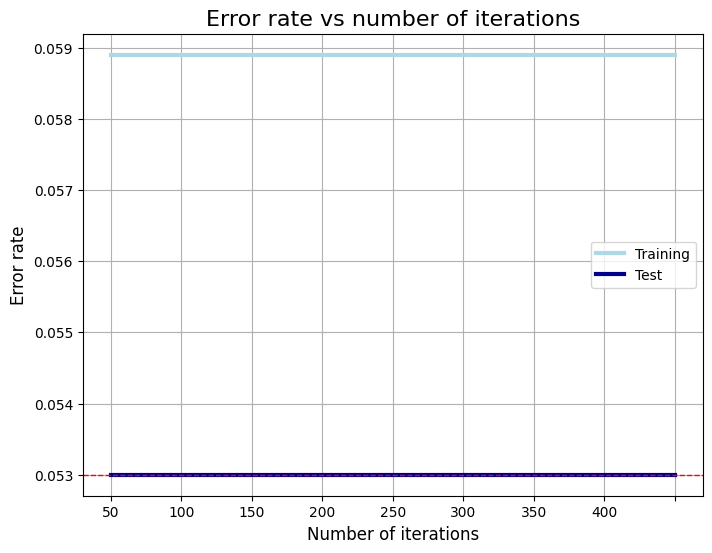

In [46]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  # 更新库调用
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt


def get_error_rate(pred, Y):
    return np.mean(pred != Y)


def print_error_rate(err):
    print(f'Error rate: Training: {err[0]:.4f} - Test: {err[1]:.4f}')


def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train, Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test)

# ADABOOST numpy实现
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    w = np.ones(n_train) / n_train
    pred_train, pred_test = np.zeros(n_train), np.zeros(n_test)
    
    for i in range(M):
        clf.fit(X_train, Y_train, sample_weight=w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        
        miss = pred_train_i != Y_train
        err_m = np.dot(w, miss) / np.sum(w)
        alpha_m = 0.5 * np.log((1 - err_m) / (err_m + 1e-10))  # Add small value to avoid division by zero
        w *= np.exp(-alpha_m * Y_train * pred_train_i)  # 更新一下权重
        
        pred_train += alpha_m * pred_train_i
        pred_test += alpha_m * pred_test_i
    
    pred_train = np.sign(pred_train)
    pred_test = np.sign(pred_test)
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test)

# PLOT FUNCTION
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame({'Training': er_train, 'Test': er_test})
    plot1 = df_error.plot(linewidth=3, figsize=(8, 6), color=['lightblue', 'darkblue'], grid=True)
    plot1.set_xlabel('Number of iterations', fontsize=12)
    plot1.set_xticklabels(range(0, 450, 50))
    plot1.set_ylabel('Error rate', fontsize=12)
    plot1.set_title('Error rate vs number of iterations', fontsize=16)
    plt.axhline(y=er_test[0], linewidth=1, color='red', ls='dashed')

# MAIN SCRIPT
if __name__ == '__main__':
    x, y = make_hastie_10_2(random_state=1)  # Adding random_state for reproducibility
    df = pd.DataFrame(x)
    df['Y'] = y


    # 训练数据集
    X_train, y_train = train_data_df.iloc[:, :-1], train_data_df.iloc[:, 2]
    X_eval, y_eval = eval_data_df.iloc[:, :-1], eval_data_df.iloc[:, 2]
    X_test = test_data_df.iloc[:, : - 1]
        
    clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)
    er_tree = generic_clf(y_train, X_train, y_eval, X_eval, clf_tree)
    print_error_rate(er_tree)

    er_train, er_test = [er_tree[0]], [er_tree[1]]
    x_range = range(10, 410, 10)
    for i in x_range:
        er_i = adaboost_clf(y_train, X_train,  y_eval, X_eval, i, clf_tree)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
    plot_error_rate(er_train, er_test)
    plt.show()